## Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fraud_dataset.csv')

In [ ]:
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300171 entries, 0 to 300170
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count   Dtype 
---  ------                                                       --------------   ----- 
 0   Numero d'identification / Number ID                          300171 non-null  int64 
 1   Date Received / Date recue                                   300171 non-null  object
 2   Complaint Received Type                                      300171 non-null  object
 3   Type de plainte recue                                        300171 non-null  object
 4   Country                                                      300171 non-null  object
 5   Pays                                                         300171 non-null  object
 6   Province/State                                               300171 non-null  object
 7   Province/Etat                                                300171 non-nu

In [5]:
df["Country"].value_counts()

Country
Canada                             227702
Not Specified                       68426
United States                        1833
India                                 226
United Kingdom                        145
                                    ...  
Antigua and Barbuda                     1
Palestinian Territory, Occupied         1
Libya                                   1
Tajikistan                              1
Lithuania                               1
Name: count, Length: 155, dtype: int64

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300171 entries, 0 to 300170
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count   Dtype 
---  ------                                                       --------------   ----- 
 0   Numero d'identification / Number ID                          300171 non-null  int64 
 1   Date Received / Date recue                                   300171 non-null  object
 2   Complaint Received Type                                      300171 non-null  object
 3   Type de plainte recue                                        300171 non-null  object
 4   Country                                                      300171 non-null  object
 5   Pays                                                         300171 non-null  object
 6   Province/State                                               300171 non-null  object
 7   Province/Etat                                                300171 non-nu

In [8]:
# Keep necessary columns only 

df = df[["Complaint Received Type", "Country", "Province/State", "Fraud and Cybercrime Thematic Categories", "Solicitation Method", "Gender", "Victim Age Range / Tranche d'age des victimes", "Complaint Type", "Dollar Loss /pertes financieres", "Number of Victims / Nombre de victimes" ]]

In [9]:
df.head(1)

,Complaint Received Type,Country,Province/State,Fraud and Cybercrime Thematic Categories,Solicitation Method,Gender,Victim Age Range / Tranche d'age des victimes,Complaint Type,Dollar Loss /pertes financieres,Number of Victims / Nombre de victimes
0,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Not Available,'Not Available / non disponible,Attempt,$0.00,0


In [10]:
# Drop Complaint Received Type column since doesnt affect outcome

df = df.drop("Complaint Received Type", axis=1)

In [11]:
# Function that will combine all countries with inputs fewer than cutoff point into "Outside of Canada/US"

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Outside of Canada/US'
    return categorical_map

In [12]:
country_map = shorten_categories(df.Country.value_counts(), 1000)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Canada                  227702
Not Specified            68426
Outside of Canada/US      2210
United States             1833
Name: count, dtype: int64

In [13]:
df["Province/State"].value_counts().head(25)

Province/State
Ontario                      87348
Not Specified                71494
Quebec                       61631
British Columbia             28602
Alberta                      23803
Manitoba                      8191
Saskatchewan                  5395
Nova Scotia                   4917
New Brunswick                 4032
Newfoundland And Labrador     1758
Prince Edward Island           780
California                     521
Yukon                          271
North West Territories         171
New York                       123
Florida                        115
Texas                           92
Nunavut                         86
Washington                      76
Michigan                        50
Massachusetts                   46
Pennsylvania                    44
Virginia                        39
Illinois                        39
Arizona                         36
Name: count, dtype: int64

In [14]:
# Function that will combine all "Province/State" with inputs fewer than cutoff point into "Other"

def shorten_categories2(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [15]:
major_province_map = shorten_categories2(df['Province/State'].value_counts(), 60)
df['Major Province/State'] = df['Province/State'].map(major_province_map)
df['Major Province/State'].value_counts()

Major Province/State
Ontario                      87348
Not Specified                71494
Quebec                       61631
British Columbia             28602
Alberta                      23803
Manitoba                      8191
Saskatchewan                  5395
Nova Scotia                   4917
New Brunswick                 4032
Newfoundland And Labrador     1758
Prince Edward Island           780
Other                          765
California                     521
Yukon                          271
North West Territories         171
New York                       123
Florida                        115
Texas                           92
Nunavut                         86
Washington                      76
Name: count, dtype: int64

In [16]:
df = df.drop("Province/State", axis=1)

In [17]:
df.head(1)

,Country,Fraud and Cybercrime Thematic Categories,Solicitation Method,Gender,Victim Age Range / Tranche d'age des victimes,Complaint Type,Dollar Loss /pertes financieres,Number of Victims / Nombre de victimes,Major Province/State
0,Canada,Merchandise,Other/unknown,Not Available,'Not Available / non disponible,Attempt,$0.00,0,Saskatchewan


In [18]:
df["Fraud and Cybercrime Thematic Categories"].value_counts()

Fraud and Cybercrime Thematic Categories
Identity Fraud                                70024
Extortion                                     28453
Phishing                                      26533
Personal Info                                 24866
Service                                       22510
Investments                                   15642
Merchandise                                   15262
Counterfeit Merchandise                       12949
Bank Investigator                             12553
Job                                           11401
Vendor Fraud                                   9372
Other                                          8824
Unknown                                        8381
Emergency (Jail, Accident, Hospital, Help)     7160
Romance                                        5448
Spear Phishing                                 5397
Prize                                          4220
False Billing                                  1808
GRANT                  

In [19]:
# Function that will combine all "Fraud and Cybercrime Thematic Categories" with inputs fewer than cutoff point into "Other"

def shorten_categories3(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [20]:
fraud_type_map = shorten_categories3(df['Fraud and Cybercrime Thematic Categories'].value_counts(), 500)
df['Fraud/Cybercrime Category'] = df['Fraud and Cybercrime Thematic Categories'].map(fraud_type_map)
df['Fraud/Cybercrime Category'].value_counts()

Fraud/Cybercrime Category
Identity Fraud                                70024
Extortion                                     28453
Phishing                                      26533
Personal Info                                 24866
Service                                       22510
Investments                                   15642
Merchandise                                   15262
Counterfeit Merchandise                       12949
Bank Investigator                             12553
Job                                           11401
Other                                         10623
Vendor Fraud                                   9372
Unknown                                        8381
Emergency (Jail, Accident, Hospital, Help)     7160
Romance                                        5448
Spear Phishing                                 5397
Prize                                          4220
False Billing                                  1808
GRANT                                 

In [21]:
df = df.drop("Fraud and Cybercrime Thematic Categories", axis=1)

In [22]:
# Combine "Incomplete" into "Unknown"
df['Fraud/Cybercrime Category'] = df['Fraud/Cybercrime Category'].replace("Incomplete", "Unknown")

In [23]:
df['Fraud/Cybercrime Category'].value_counts()

Fraud/Cybercrime Category
Identity Fraud                                70024
Extortion                                     28453
Phishing                                      26533
Personal Info                                 24866
Service                                       22510
Investments                                   15642
Merchandise                                   15262
Counterfeit Merchandise                       12949
Bank Investigator                             12553
Job                                           11401
Other                                         10623
Vendor Fraud                                   9372
Unknown                                        9007
Emergency (Jail, Accident, Hospital, Help)     7160
Romance                                        5448
Spear Phishing                                 5397
Prize                                          4220
False Billing                                  1808
GRANT                                 

In [24]:
df.head(1)

,Country,Solicitation Method,Gender,Victim Age Range / Tranche d'age des victimes,Complaint Type,Dollar Loss /pertes financieres,Number of Victims / Nombre de victimes,Major Province/State,Fraud/Cybercrime Category
0,Canada,Other/unknown,Not Available,'Not Available / non disponible,Attempt,$0.00,0,Saskatchewan,Merchandise


In [25]:
df['Solicitation Method'].value_counts()

Solicitation Method
Other/unknown              87908
Direct call                71567
Email                      33123
Internet-social network    32026
Internet                   28476
Text message               23690
Not Available              16862
Door to door/in person      3495
Mail                        2659
Fax                          162
Video Call                    89
Television                    60
Print                         49
Radio                          5
Name: count, dtype: int64

In [26]:
# Regrouping
df['Solicitation Method'] = df['Solicitation Method'].replace("Radio", "Other/unknown")
df['Solicitation Method'] = df['Solicitation Method'].replace("Print", "Other/unknown")
df['Solicitation Method'] = df['Solicitation Method'].replace("Television", "Other/unknown")

In [27]:
df['Solicitation Method'] = df['Solicitation Method'].replace("Video Call", "Other/unknown")
df['Solicitation Method'] = df['Solicitation Method'].replace("Fax", "Other/unknown")
df['Solicitation Method'] = df['Solicitation Method'].replace("Other/unknown", "Other")

In [28]:
df['Solicitation Method'] = df['Solicitation Method'].replace("Not Available", "Not Specified")

In [29]:
df['Solicitation Method'].value_counts()

Solicitation Method
Other                      88273
Direct call                71567
Email                      33123
Internet-social network    32026
Internet                   28476
Text message               23690
Not Specified              16862
Door to door/in person      3495
Mail                        2659
Name: count, dtype: int64

In [30]:
df['Gender'].value_counts()

Gender
Female               113825
Male                 109059
Not Available         75535
Unknown                1065
Prefer not to say       445
Other                   242
Name: count, dtype: int64

In [31]:
# Regrouping
df['Gender'] = df['Gender'].replace("Other", "Other/Not Specified")
df['Gender'] = df['Gender'].replace("Prefer not to say", "Other/Not Specified")
df['Gender'] = df['Gender'].replace("Unknown", "Other/Not Specified")
df['Gender'] = df['Gender'].replace("Not Available", "Other/Not Specified")

In [32]:
df['Gender'].value_counts()

Gender
Female                 113825
Male                   109059
Other/Not Specified     77287
Name: count, dtype: int64

In [33]:
df = df.rename({"Number of Victims / Nombre de victimes": "Victim Result"}, axis=1)

In [34]:
df = df.rename({"Victim Age Range / Tranche d'age des victimes": "Victim Age Group"}, axis=1)

In [35]:
df['Victim Age Group'].value_counts()

Victim Age Group
'Not Available / non disponible    89919
'30 - 39                           39469
'60 - 69                           34578
'40 - 49                           34289
'20 - 29                           31947
'50 - 59                           31366
'70 - 79                           21285
'10 - 19                            9295
'80 - 89                            6722
'90 - 99                             901
'1 - 9                               160
'Deceased / Décédé                   159
'100 +                                58
'Business / Entreprise                23
Name: count, dtype: int64

In [36]:
df['Victim Age Group'] = df['Victim Age Group'].replace("'Not Available / non disponible", "Not Specified")

In [37]:
# Regrouping

df['Victim Age Group'] = df['Victim Age Group'].replace("'Not Available / non disponible", "Not Specified")
df['Victim Age Group'] = df['Victim Age Group'].replace("'1 - 9", "'10 - 19")
df['Victim Age Group'] = df['Victim Age Group'].replace("'80 - 89", "'80 +")
df['Victim Age Group'] = df['Victim Age Group'].replace("'90 - 99", "'80 +")
df['Victim Age Group'] = df['Victim Age Group'].replace("'100 +", "'80 +")
df['Victim Age Group'] = df['Victim Age Group'].replace("'Deceased / Décédé", "'80 +")
df['Victim Age Group'] = df['Victim Age Group'].replace("'Business / Entreprise", "Not Specified")

In [38]:
df['Victim Age Group'] = df['Victim Age Group'].replace("'10 - 19", "'1 - 19")

In [39]:
df['Victim Age Group'].value_counts()

Victim Age Group
Not Specified    89942
'30 - 39         39469
'60 - 69         34578
'40 - 49         34289
'20 - 29         31947
'50 - 59         31366
'70 - 79         21285
'1 - 19           9455
'80 +             7840
Name: count, dtype: int64

In [40]:
df['Complaint Type'].value_counts()

Complaint Type
Victim        193482
Attempt        99870
Other           5552
Unknown          838
Incomplete       429
Name: count, dtype: int64

In [41]:
# Regrouping
df['Complaint Type'] = df['Complaint Type'].replace("Incomplete", "Other")
df['Complaint Type'] = df['Complaint Type'].replace("Unknown", "Other")

In [42]:
df['Complaint Type'].value_counts()

Complaint Type
Victim     193482
Attempt     99870
Other        6819
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300171 entries, 0 to 300170
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Country                          300171 non-null  object
 1   Solicitation Method              300171 non-null  object
 2   Gender                           300171 non-null  object
 3   Victim Age Group                 300171 non-null  object
 4   Complaint Type                   300171 non-null  object
 5   Dollar Loss /pertes financieres  300171 non-null  object
 6   Victim Result                    300171 non-null  int64 
 7   Major Province/State             300171 non-null  object
 8   Fraud/Cybercrime Category        300171 non-null  object
dtypes: int64(1), object(8)
memory usage: 20.6+ MB


In [44]:
df = df.rename({"Dollar Loss /pertes financieres": "Dollar Loss ($CAD)"}, axis=1)

In [45]:
df['Dollar Loss ($CAD)'].value_counts()

Dollar Loss ($CAD)
$0.00          229212
$1,000.00        1396
$500.00          1343
$2,000.00         967
$200.00           940
                ...  
$5,774.00           1
$1,986.32           1
$294,436.80         1
$34,610.01          1
$2,945.00           1
Name: count, Length: 21453, dtype: int64

In [46]:
df["Dollar Loss ($CAD)"] = df["Dollar Loss ($CAD)"].str.replace('$', '')

In [47]:
df["Dollar Loss ($CAD)"] = df["Dollar Loss ($CAD)"].str.replace(',', '')

In [48]:
df["Dollar Loss ($CAD)"] = pd.to_numeric(df["Dollar Loss ($CAD)"])

In [49]:
df["Dollar Loss ($CAD)"].dtype

dtype('float64')

In [50]:
df.head(1)

,Country,Solicitation Method,Gender,Victim Age Group,Complaint Type,Dollar Loss ($CAD),Victim Result,Major Province/State,Fraud/Cybercrime Category
0,Canada,Other,Other/Not Specified,Not Specified,Attempt,0.0,0,Saskatchewan,Merchandise


In [51]:
# Reorder columns 

df = df[["Country", "Major Province/State", "Gender", "Victim Age Group", "Complaint Type", "Fraud/Cybercrime Category", "Solicitation Method", "Dollar Loss ($CAD)", "Victim Result" ]]

In [52]:
df.head(10)

,Country,Major Province/State,Gender,Victim Age Group,Complaint Type,Fraud/Cybercrime Category,Solicitation Method,Dollar Loss ($CAD),Victim Result
0,Canada,Saskatchewan,Other/Not Specified,Not Specified,Attempt,Merchandise,Other,0.00,0
1,Not Specified,Not Specified,Other/Not Specified,Not Specified,Victim,Merchandise,Internet,1000.00,1
2,Canada,Quebec,Male,'40 - 49,Victim,Identity Fraud,Other,0.00,1
3,Canada,Saskatchewan,Male,'30 - 39,Victim,Phishing,Email,0.00,1
4,Canada,Saskatchewan,Male,'60 - 69,Victim,Merchandise,Other,222.73,1
5,Canada,Ontario,Male,'30 - 39,Attempt,Phishing,Text message,0.00,0
6,Canada,British Columbia,Female,'70 - 79,Victim,Identity Fraud,Other,0.00,1
7,Canada,British Columbia,Male,'1 - 19,Victim,Vendor Fraud,Text message,300.00,1
8,Not Specified,Not Specified,Male,Not Specified,Other,Other,Internet,0.00,0
9,Canada,Quebec,Female,'40 - 49,Victim,Phishing,Text message,0.00,1


In [53]:
df.groupby(['Complaint Type'])['Victim Result'].value_counts()

Complaint Type  Victim Result
Attempt         0                 99870
Other           0                  6819
Victim          1                193482
Name: count, dtype: int64

In [54]:
df = df.drop("Complaint Type", axis=1)

In [55]:
df.groupby(['Dollar Loss ($CAD)'])['Victim Result'].value_counts()

Dollar Loss ($CAD)  Victim Result
0.00                1                122523
                    0                106689
0.01                1                    85
0.02                1                     2
0.03                1                     1
                                      ...  
9500000.00          1                     1
15059475.00         1                     1
15130000.00         1                     1
18599009.70         1                     1
23615000.00         1                     1
Name: count, Length: 21454, dtype: int64

In [56]:
df['Victim Result'].value_counts()

Victim Result
1    193482
0    106689
Name: count, dtype: int64

In [57]:
df = df.drop("Dollar Loss ($CAD)", axis=1)

Deal with all "Not Specified" values in data that are too prelevant

In [59]:
df['Country'].value_counts()

Country
Canada                  227702
Not Specified            68426
Outside of Canada/US      2210
United States             1833
Name: count, dtype: int64

In [60]:
df.groupby(['Country'])['Victim Result'].value_counts()

Country               Victim Result
Canada                1                154557
                      0                 73145
Not Specified         1                 36197
                      0                 32229
Outside of Canada/US  1                  1656
                      0                   554
United States         1                  1072
                      0                   761
Name: count, dtype: int64

In [61]:
df.head()

,Country,Major Province/State,Gender,Victim Age Group,Fraud/Cybercrime Category,Solicitation Method,Victim Result
0,Canada,Saskatchewan,Other/Not Specified,Not Specified,Merchandise,Other,0
1,Not Specified,Not Specified,Other/Not Specified,Not Specified,Merchandise,Internet,1
2,Canada,Quebec,Male,'40 - 49,Identity Fraud,Other,1
3,Canada,Saskatchewan,Male,'30 - 39,Phishing,Email,1
4,Canada,Saskatchewan,Male,'60 - 69,Merchandise,Other,1


In [62]:
# drop all rows labelled "Not Specified" in Country column

df = df.drop(df[df['Country'] == 'Not Specified'].index)

In [64]:
df['Major Province/State'].value_counts()

Major Province/State
Ontario                      87348
Quebec                       61631
British Columbia             28602
Alberta                      23803
Manitoba                      8191
Saskatchewan                  5395
Nova Scotia                   4917
New Brunswick                 4032
Not Specified                 3068
Newfoundland And Labrador     1758
Prince Edward Island           780
Other                          765
California                     521
Yukon                          271
North West Territories         171
New York                       123
Florida                        115
Texas                           92
Nunavut                         86
Washington                      76
Name: count, dtype: int64

In [78]:
df = df.drop(df[df['Major Province/State'] == 'Not Specified'].index)

In [80]:
df['Victim Age Group'].value_counts()

Victim Age Group
'30 - 39         38131
'60 - 69         34031
'40 - 49         33379
'20 - 29         30839
'50 - 59         30714
Not Specified    23629
'70 - 79         20993
'1 - 19           9255
'80 +             7706
Name: count, dtype: int64

In [82]:
df = df.drop(df[df['Victim Age Group'] == 'Not Specified'].index)

In [84]:
df['Fraud/Cybercrime Category'].value_counts()

Fraud/Cybercrime Category
Identity Fraud                                59797
Personal Info                                 20457
Extortion                                     17426
Service                                       16046
Phishing                                      16037
Investments                                   10435
Merchandise                                   10113
Bank Investigator                              9074
Job                                            6744
Vendor Fraud                                   6247
Other                                          5600
Emergency (Jail, Accident, Hospital, Help)     5588
Unknown                                        4982
Romance                                        3672
Prize                                          2949
Counterfeit Merchandise                        1934
Spear Phishing                                 1842
GRANT                                          1296
False Billing                         

In [86]:
df = df.drop(df[df['Fraud/Cybercrime Category'] == 'Unknown'].index)

In [88]:
df = df.reset_index(drop=True)

In [90]:
df.head()

,Country,Major Province/State,Gender,Victim Age Group,Fraud/Cybercrime Category,Solicitation Method,Victim Result
0,Canada,Quebec,Male,'40 - 49,Identity Fraud,Other,1
1,Canada,Saskatchewan,Male,'30 - 39,Phishing,Email,1
2,Canada,Saskatchewan,Male,'60 - 69,Merchandise,Other,1
3,Canada,Ontario,Male,'30 - 39,Phishing,Text message,0
4,Canada,British Columbia,Female,'70 - 79,Identity Fraud,Other,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200066 entries, 0 to 200065
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Country                    200066 non-null  object
 1   Major Province/State       200066 non-null  object
 2   Gender                     200066 non-null  object
 3   Victim Age Group           200066 non-null  object
 4   Fraud/Cybercrime Category  200066 non-null  object
 5   Solicitation Method        200066 non-null  object
 6   Victim Result              200066 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 10.7+ MB


In [94]:
df['Victim Result'].value_counts()

Victim Result
1    142543
0     57523
Name: count, dtype: int64

In [96]:
df['Country'].value_counts()

Country
Canada           199003
United States      1063
Name: count, dtype: int64

In [98]:
df_fraud_cleaned = df
df_fraud_cleaned

,Country,Major Province/State,Gender,Victim Age Group,Fraud/Cybercrime Category,Solicitation Method,Victim Result
0,Canada,Quebec,Male,'40 - 49,Identity Fraud,Other,1
1,Canada,Saskatchewan,Male,'30 - 39,Phishing,Email,1
2,Canada,Saskatchewan,Male,'60 - 69,Merchandise,Other,1
3,Canada,Ontario,Male,'30 - 39,Phishing,Text message,0
4,Canada,British Columbia,Female,'70 - 79,Identity Fraud,Other,1
...,...,...,...,...,...,...,...
200061,Canada,Manitoba,Male,'1 - 19,Extortion,Internet-social network,1
200062,Canada,Quebec,Female,'40 - 49,Service,Internet,1
200063,Canada,Manitoba,Male,'20 - 29,Extortion,Internet,1
200064,Canada,Ontario,Female,'70 - 79,Bank Investigator,Direct call,0


In [100]:
# df_fraud_cleaned.to_csv("Cleaned_fraud_data.csv", index=False)

## EDA Visulizations

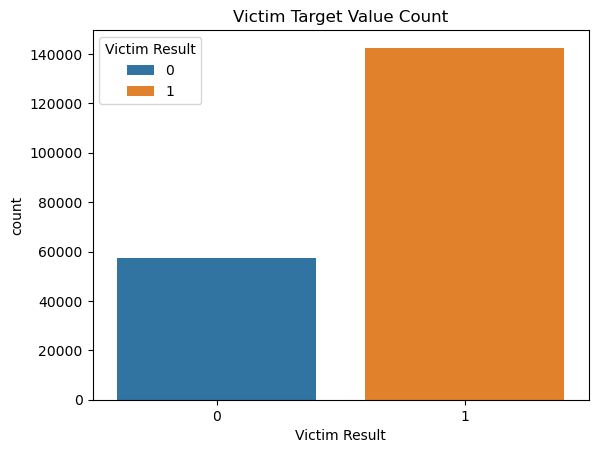

In [102]:
sns.countplot(data=df,x='Victim Result', hue='Victim Result')
plt.title('Victim Target Value Count')
plt.show()

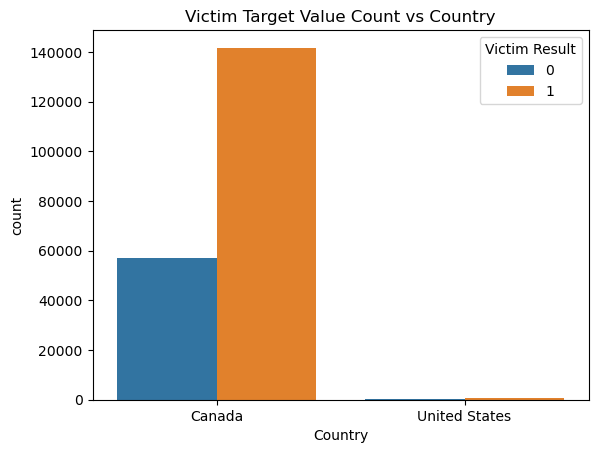

In [142]:
sns.countplot(data=df,x='Country', hue='Victim Result')
plt.title('Victim Target Value Count vs Country')
plt.show()

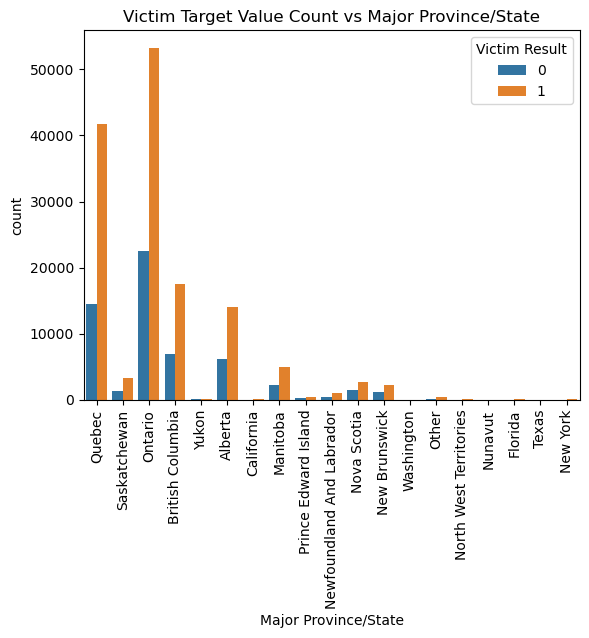

In [170]:
sns.countplot(data=df,x='Major Province/State', hue='Victim Result')
plt.title('Victim Target Value Count vs Major Province/State')
plt.xticks(rotation=90)
plt.show()

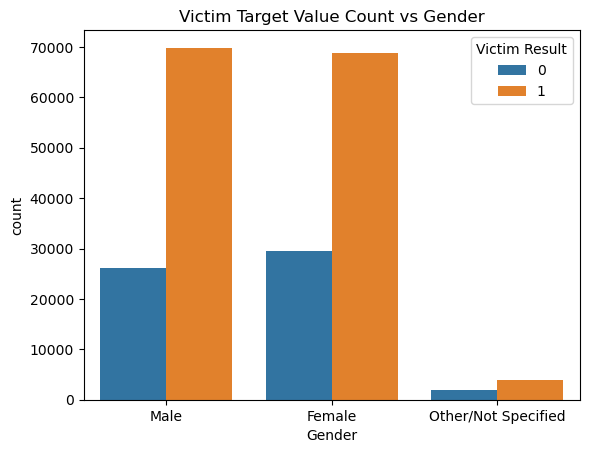

In [138]:
sns.countplot(data=df,x='Gender', hue='Victim Result')
plt.title('Victim Target Value Count vs Gender')
plt.show()

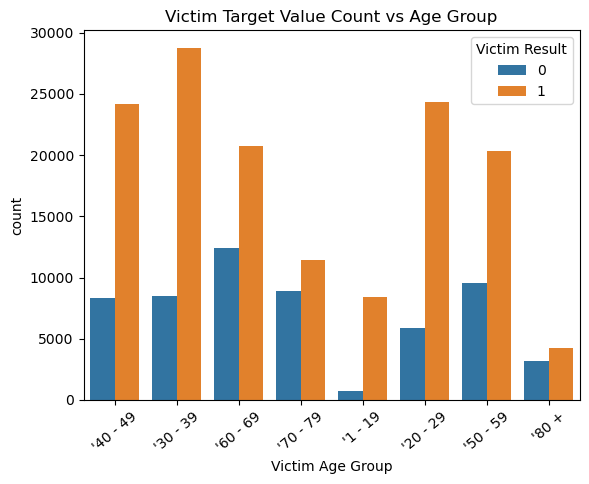

In [150]:
sns.countplot(data=df,x='Victim Age Group', hue='Victim Result')
plt.title('Victim Target Value Count vs Age Group')
plt.xticks(rotation=40)
plt.show()

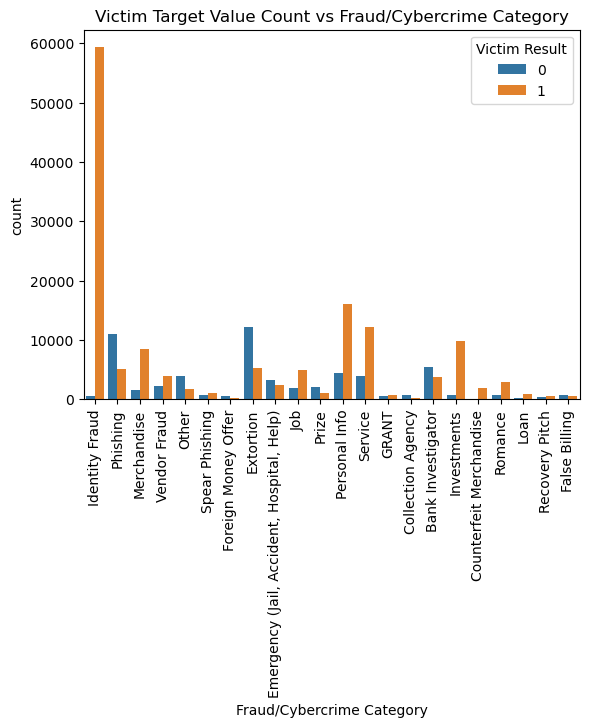

In [166]:
sns.countplot(data=df,x='Fraud/Cybercrime Category', hue='Victim Result')
plt.title('Victim Target Value Count vs Fraud/Cybercrime Category')
plt.xticks(rotation=90)
plt.show()

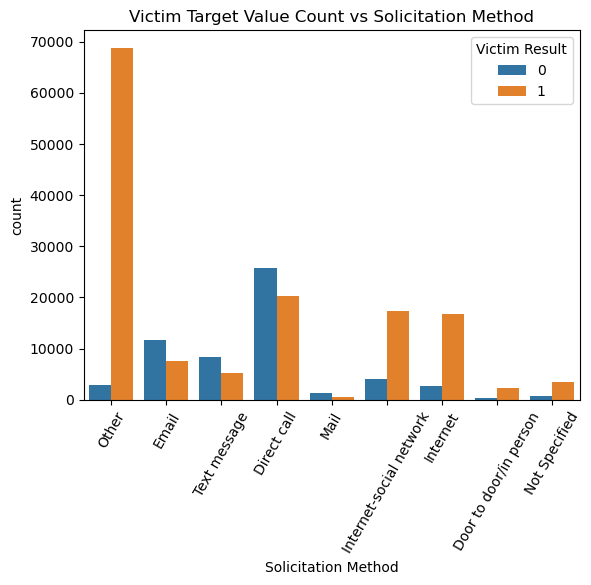

In [162]:
sns.countplot(data=df,x='Solicitation Method', hue='Victim Result')
plt.title('Victim Target Value Count vs Solicitation Method')
plt.xticks(rotation=60)
plt.show()